*Tarea desarrollada en forma individual*

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
from PIL import Image
import os
import matplotlib.pyplot as plt
import collections

#  La paradoja de la amistad
##### En 1991 el sociólogo Scoot L. Feld realizó un experimento en el que observó que, en promedio, la mayoría de las personas tiene menos amigos que sus amigos. Considere la siguiente formula que expresa el grado promedio de los vecinos de un nodo de grado $k$:
$$k_{nn}(k)=\frac{<k^2>}{<k>}$$

##### Recuerde que para efectos prácticos $< k_n >= \frac{1}{N} \sum_{i=1}^{N} k_i^n$ , con N el número de nodos presentes en el grafo y $k_i$ el grado del nodo $i$.

##### a) Muestre que la diferencia entre $k_{nn}(k)$ y $< k >$ es positiva. Para esto recuerde que la varianza se puede escribir como $Var(k) = < k^2 > − < k >^2$.

En primer lugar, se debe recordar que la varianza es la sumatoria de las distancias al cuadrado entre cada observación y el promedio, todo eso dividido en la cantidad de observaciones. Entonces se tiene que $Var(x)$ es siempre **positiva**, es decir, 
$$Var(k) > 0\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1)$$
Por otra parte se tiene que: $$k_{nn}(k)=\frac{<k^2>}{<k>}\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (2)$$
$$Var(k)= <k^2> - <k>^2 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (3)$$
De (2) se despeja $<k^2>$ : $$<k^2> = <k> \cdot \ k_{nn}(k)\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (4)$$
Se reemplaza (4) en (3):
$$ Var(k)=<k> \cdot \ k_{nn}(k)\ - <k>^2\ \ \ \ (5)$$
$$ Var(k)=<k> ( \ k_{nn}(k)\ - <k>\ )\ \ \ \ \ \ \ $$
Además, el dominio de los grados de un grafo está en los enteros positivos, por lo que su promedio también es positivo:
$$k_{i} \in \mathbb{Z}_0^+ \ \Rightarrow \ <k> \in \mathbb{R}_0^+\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (6)$$
Luego, de (1) y (6):
$$ \underbrace{Var(k)} = \underbrace{<k>} (\ k_{nn}(k)\ - <k>\ )\ \ \ \ \ \ \ $$
$$ \ \ \ positivo\ \ \ \ \ positivo \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$
Por lo tanto, como el producto debe ser positivo y uno de los factores es positivo, la expresión es **positiva**:
$$ \underbrace{Var(k)} = \underbrace{<k>} \underbrace{(\ k_{nn}(k)\ - <k>\ )}\ \ \ \ \ \ \ $$

$$ \ \ \ positivo\ \ \ \ \ positivo \ \ \ \ \ \ \ \ \ \ \ positivo\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$

$$ k_{nn}(k)\ - <k> \ > \ 0$$


##### b) Usando lo demostrado anteriormente, fundamente la existencia de la paradoja de la amistad.

Sea cada nodo una persona y cada arco una relación de amistad, entonces si dos nodos están conectados, son amigos. Bajo esta premisa, la cantidad de amigos de una persona, corresponde al grado del nodo que representa a esa persona.  
Como se mostró anteriormente, el grado promedio de los vecinos de un nodo de grado k es mayor al grado promedio del grafo: $k_{nn}(k)$ **>**  $<k>$. En otras palabras, el número de amigos promedio de los amigos de una persona es mayor al número promedio de amigos en la red, y por tanto, mayor al número de amigos de un individuo.

##### c) Usando el paquete Networkx, genere un grafo de Erdős-Rényi ($p = 0.01$), de Watts-Strogatz ($p = 0.6$, $k = 3$) y de Barabási-Albert ($m = 3$) con 100 nodos cada uno. Veriﬁque que la paradoja se presenta en los tres casos.


Se define la siguiente función para verificar la paradoja, donde se revisa si $k_{nn}(k)$ > $<k>$:


In [4]:
def verifica_paradoja(grafo, g):
    suma_GER = 0
    for nodo, grado in grafo.degree:
        suma_GER+=grado
    k = suma_GER/len(grafo.nodes)
    
    grado_nodos = {}
    for n, d in grafo.degree():
        if d not in grado_nodos:
            grado_nodos[d] = [n]
        elif d in grado_nodos:
            grado_nodos[d].append(n)
    #print(grado_nodos[g])
    k_nn = round(sum(nx.average_neighbor_degree(grafo, nodes=grado_nodos[g]).values())/len(grado_nodos[g]),2)
    print('##################################')
    return(print('k_nn('+str(g)+') = '+str(k_nn)+'  >  <k> = '+ str(k), '\nSe verifica que k_nn(k) > <k>'))

##### Grafo Erdős-Rényi

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


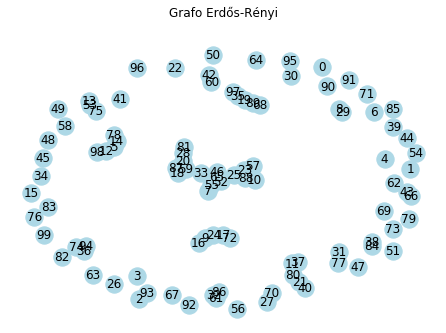

In [5]:
G_ErdosRenyi = nx.erdos_renyi_graph(100,0.01,seed = 311)
pos_ER = nx.spring_layout(G_ErdosRenyi, seed = 8)
nx.draw(G_ErdosRenyi, pos = pos_ER, with_labels=True, node_color = 'lightblue') 
plt.title('Grafo Erdős-Rényi\n')
plt.show();

Verificación de la paradoja

In [6]:
degree_sequence = sorted([d for n, d in G_ErdosRenyi.degree()], reverse=True) #Reutilizado de https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
for i in list(set(degree_sequence)-{0}):
    verifica_paradoja(G_ErdosRenyi,i)

##################################
k_nn(1) = 2.0  >  <k> = 0.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(2) = 1.84  >  <k> = 0.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(3) = 3.0  >  <k> = 0.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(4) = 1.5  >  <k> = 0.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(5) = 1.8  >  <k> = 0.82 
Se verifica que k_nn(k) > <k>


##### Grafo Watts-Strogatz

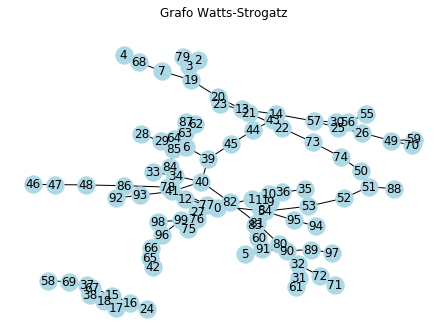

In [7]:
G_WattsStrogatz = nx.watts_strogatz_graph(100,3,0.6,seed = 311)
pos_WS = nx.spring_layout(G_WattsStrogatz, seed = 312)
nx.draw(G_WattsStrogatz, pos = pos_WS, with_labels=True, node_color = 'lightblue') 
plt.title('Grafo Watts-Strogatz\n')
plt.show();

Verificación de la paradoja

In [8]:
degree_sequence = sorted([d for n, d in G_WattsStrogatz.degree()], reverse=True) #Reutilizado de https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
for i in list(set(degree_sequence)-{0}):
    verifica_paradoja(G_WattsStrogatz,i)

##################################
k_nn(1) = 2.57  >  <k> = 2.0 
Se verifica que k_nn(k) > <k>
##################################
k_nn(2) = 2.28  >  <k> = 2.0 
Se verifica que k_nn(k) > <k>
##################################
k_nn(3) = 2.32  >  <k> = 2.0 
Se verifica que k_nn(k) > <k>
##################################
k_nn(4) = 2.5  >  <k> = 2.0 
Se verifica que k_nn(k) > <k>
##################################
k_nn(5) = 2.2  >  <k> = 2.0 
Se verifica que k_nn(k) > <k>


##### Grafo Barabási-Albert

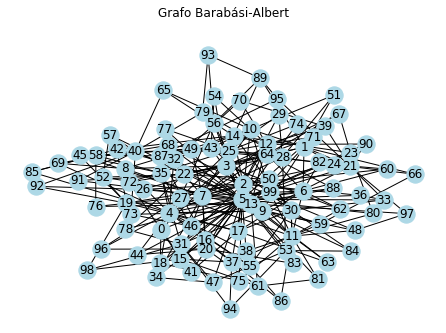

In [9]:
G_BarabasiAlbert = nx.barabasi_albert_graph(100,3,seed = 311)
pos_BA = nx.spring_layout(G_BarabasiAlbert,  seed = 312)
nx.draw(G_BarabasiAlbert, pos = pos_BA, with_labels=True, node_color = 'lightblue') 
plt.title('Grafo Barabási-Albert\n')
plt.show();

Verificación de la paradoja

In [10]:
degree_sequence = sorted([d for n, d in G_BarabasiAlbert.degree()], reverse=True) #Reutilizado de https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
for i in list(set(degree_sequence)-{0}):
    verifica_paradoja(G_BarabasiAlbert,i)

##################################
k_nn(3) = 13.77  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(4) = 13.84  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(5) = 12.04  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(6) = 12.04  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(7) = 11.67  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(8) = 10.21  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(9) = 8.64  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(10) = 10.16  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(13) = 9.38  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##################################
k_nn(14) = 8.79  >  <k> = 5.82 
Se verifica que k_nn(k) > <k>
##############################

##### d) Para cada grafo dibuje la distribución de sus grados (histograma) y sobre ellos dibuje las rectas verticales $x = \frac{<k^2>}{<k>}$ y $x=<k>$.

In [11]:
def histograma_grafo(grafo,title):
    suma = 0
    suma2 = 0
    counter = 0
    for n, d in grafo.degree():
        suma+=d
        suma2+=d^2
        counter +=1
    x = (suma/counter)
    x2 = (suma2/counter)/x
    degree_sequence = sorted([d for n, d in grafo.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence) 
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    #plt.figure(figzise=(5,4))
    plt.bar(deg, cnt, align='center', color='royalblue')
    plt.title(title)
    plt.ylabel("Frecuencia")
    plt.xlabel("Grado")
    plt.axvline(x, color = 'navy') 
    plt.axvline(x2, color = 'slategrey') 
    ax.set_xticks([d + 0 for d in deg])
    plt.legend(['x = <k>', 'x = <k^2>/<k>'])
    ax.set_xticklabels(deg)

    plt.show();

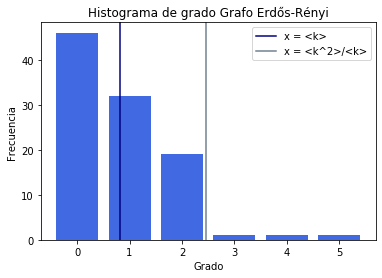

In [12]:
histograma_grafo(G_ErdosRenyi, 'Histograma de grado Grafo Erdős-Rényi')

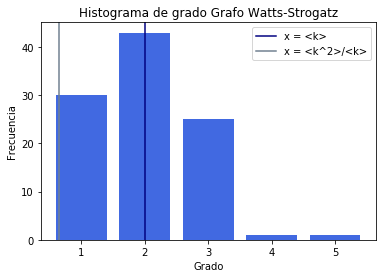

In [13]:
histograma_grafo(G_WattsStrogatz, 'Histograma de grado Grafo Watts-Strogatz')

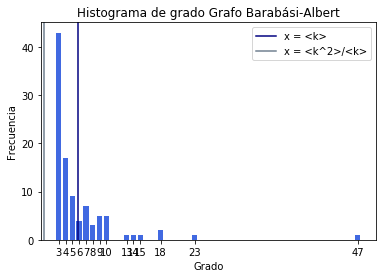

In [12]:
histograma_grafo(G_BarabasiAlbert, 'Histograma de grado Grafo Barabási-Albert')

# Importancia de un nodo
##### Genere los mismos tres grafos de la pregunta anterior, pero esta vez con 30 nodos cada uno.
##### a) Graﬁque tres veces, uno al lado del otro, la red de Erdos-Rényi de modo que el tamaño de los nodos sea proporcional a su degree centrality, closeness centrality y betweenness centrality respectivamente. Repita el mismo procedimiento para los otros dos grafos.

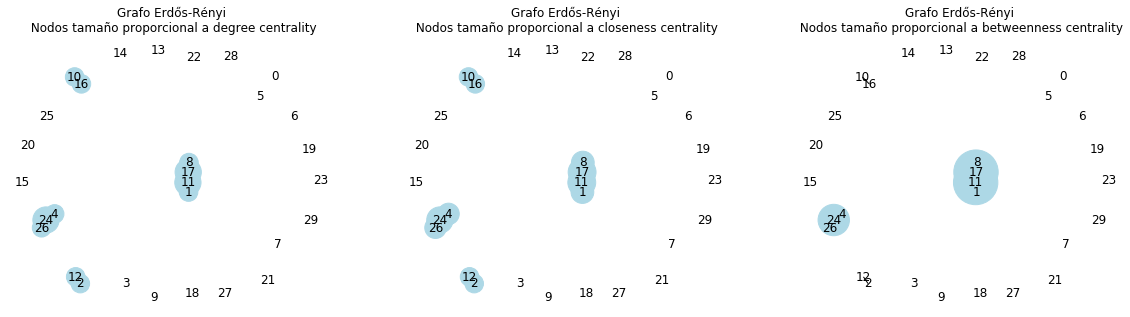

In [13]:
G_ErdosRenyi = nx.erdos_renyi_graph(30,0.01,seed = 315)
pos_ER = nx.spring_layout(G_ErdosRenyi, seed = 8)
d = nx.degree(G_ErdosRenyi)
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.title('Grafo Erdős-Rényi\n Nodos tamaño proporcional a degree centrality')
nx.draw(G_ErdosRenyi, pos = pos_ER, with_labels=True, node_color = 'lightblue', 
        node_size = [i*10000 for i in nx.degree_centrality(G_ErdosRenyi).values()]) 

plt.subplot(132)
plt.title('Grafo Erdős-Rényi\n Nodos tamaño proporcional a closeness centrality')
nx.draw(G_ErdosRenyi, pos = pos_ER, with_labels=True, node_color = 'lightblue', 
        node_size = [i*10000 for i in nx.closeness_centrality(G_ErdosRenyi).values()]) 

plt.subplot(133)
plt.title('Grafo Erdős-Rényi\n Nodos tamaño proporcional a betweenness centrality')
nx.draw(G_ErdosRenyi, pos = pos_ER, with_labels=True, node_color = 'lightblue', 
        node_size = [i*400000 for i in nx.betweenness_centrality(G_ErdosRenyi).values()]) 

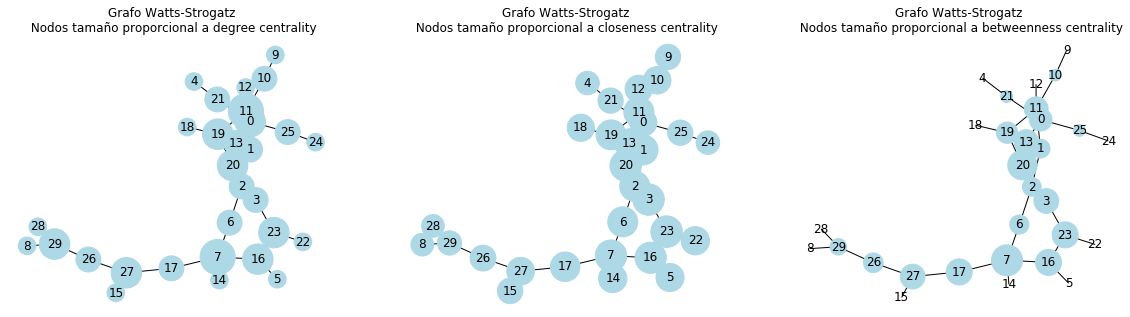

In [14]:
G_WattsStrogatz = nx.watts_strogatz_graph(30,3,0.6,seed = 315)
pos_WS = nx.spring_layout(G_WattsStrogatz, seed = 312)

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.title('Grafo Watts-Strogatz\n Nodos tamaño proporcional a degree centrality')
nx.draw(G_WattsStrogatz, pos = pos_WS, with_labels=True, node_color = 'lightblue', 
        node_size = [i*9000 for i in nx.degree_centrality(G_WattsStrogatz).values()]) 

plt.subplot(132)
plt.title('Grafo Watts-Strogatz\n Nodos tamaño proporcional a closeness centrality')
nx.draw(G_WattsStrogatz, pos = pos_WS, with_labels=True, node_color = 'lightblue', 
        node_size = [i*4000 for i in nx.closeness_centrality(G_WattsStrogatz).values()]) 

plt.subplot(133)
plt.title('Grafo Watts-Strogatz\n Nodos tamaño proporcional a betweenness centrality')
nx.draw(G_WattsStrogatz, pos = pos_WS, with_labels=True, node_color = 'lightblue', 
        node_size = [i*2000 for i in nx.betweenness_centrality(G_WattsStrogatz).values()]) 

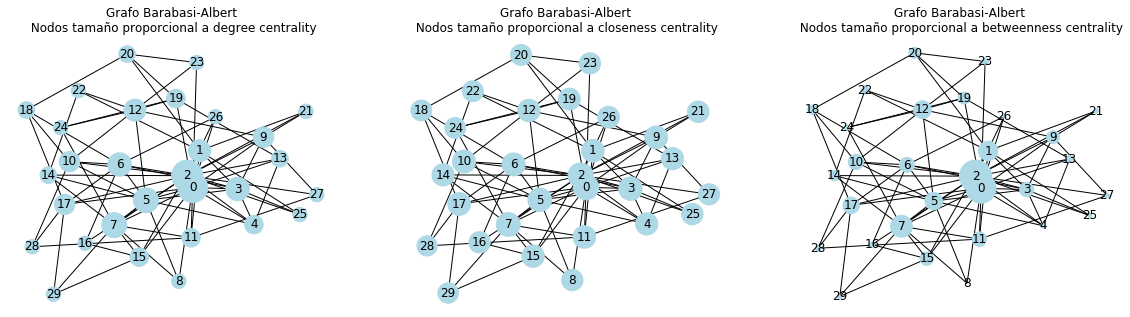

In [15]:
G_BarabasiAlbert = nx.barabasi_albert_graph(30,3,seed = 315)
pos_BA = nx.spring_layout(G_BarabasiAlbert)#,  seed = 312)

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.title('Grafo Barabasi-Albert\n Nodos tamaño proporcional a degree centrality')
nx.draw(G_BarabasiAlbert, pos = pos_BA, with_labels=True, node_color = 'lightblue', 
        node_size = [i*2000 for i in nx.degree_centrality(G_BarabasiAlbert).values()]) 

plt.subplot(132)
plt.title('Grafo Barabasi-Albert\n Nodos tamaño proporcional a closeness centrality')
nx.draw(G_BarabasiAlbert, pos = pos_BA, with_labels=True, node_color = 'lightblue', 
        node_size = [i*1000 for i in nx.closeness_centrality(G_BarabasiAlbert).values()]) 

plt.subplot(133)
plt.title('Grafo Barabasi-Albert\n Nodos tamaño proporcional a betweenness centrality')
nx.draw(G_BarabasiAlbert, pos = pos_BA, with_labels=True, node_color = 'lightblue', 
        node_size = [i*5000 for i in nx.betweenness_centrality(G_BarabasiAlbert).values()]) 

##### b) Para cada grafo, usando el paquete Pandas, cree un dataframe como se describe a continuación: en la primera columna coloque el nombre de los diez nodos con mayor score de degree centrality, en la segunda columna escriba el valor del degree centrality de cada nodo correspondiente a la primera columna, en la tercera columna escriba el valor de la closeness centrality de cada nodo y ﬁnalmente en la cuarta columna escriba el valor del betweenness centrality de cada nodo. El header del dataframe debe ser en consecuencia node id, degree centrality, closeness centrality, betweenness centrality.

In [16]:
ER = pd.DataFrame({'degree centrality':[i for i in nx.degree_centrality(G_ErdosRenyi).values()],
              'closeness centrality':[i for i in nx.closeness_centrality(G_ErdosRenyi).values()],
              'betweenness centrality':[i for i in nx.betweenness_centrality(G_ErdosRenyi).values()],
             }, index = [i for i in nx.degree_centrality(G_ErdosRenyi).keys()])
ER.index.set_names(['node_id'], inplace = True)
ER = ER.sort_values('degree centrality', ascending = False)[:10]

In [17]:
ER

,degree centrality,closeness centrality,betweenness centrality
node_id,,,
24,0.068966,0.068966,0.002463
17,0.068966,0.077586,0.004926
11,0.068966,0.077586,0.004926
2,0.034483,0.034483,0.000000
4,0.034483,0.045977,0.000000
16,0.034483,0.034483,0.000000
26,0.034483,0.045977,0.000000
1,0.034483,0.051724,0.000000
8,0.034483,0.051724,0.000000


In [18]:
WS = pd.DataFrame({'degree centrality':[i for i in nx.degree_centrality(G_WattsStrogatz).values()],
                   'closeness centrality':[i for i in nx.closeness_centrality(G_WattsStrogatz).values()],
                   'betweenness centrality':[i for i in nx.betweenness_centrality(G_WattsStrogatz).values()],
                   }, index = [i for i in nx.degree_centrality(G_WattsStrogatz).keys()])
WS.index.set_names(['node_id'], inplace = True)
WS = WS.sort_values('degree centrality', ascending = False)[:10]

In [19]:
WS

,degree centrality,closeness centrality,betweenness centrality
node_id,,,
11,0.137931,0.228346,0.283251
7,0.137931,0.247863,0.480296
0,0.103448,0.187097,0.256158
27,0.103448,0.192053,0.305419
23,0.103448,0.247863,0.339901
20,0.103448,0.247863,0.432266
19,0.103448,0.224806,0.226601
16,0.103448,0.243697,0.337438
29,0.103448,0.147208,0.135468


In [20]:
BA = pd.DataFrame({'degree centrality':[i for i in nx.degree_centrality(G_BarabasiAlbert).values()],
                   'closeness centrality':[i for i in nx.closeness_centrality(G_BarabasiAlbert).values()],
                   'betweenness centrality':[i for i in nx.betweenness_centrality(G_BarabasiAlbert).values()],
                   }, index = [i for i in nx.degree_centrality(G_BarabasiAlbert).keys()])
BA.index.set_names(['node_id'], inplace = True)
BA = BA.sort_values('degree centrality', ascending = False)[:10]

In [21]:
BA

,degree centrality,closeness centrality,betweenness centrality
node_id,,,
2,0.482759,0.630435,0.205844
0,0.448276,0.630435,0.179385
5,0.310345,0.557692,0.061484
7,0.310345,0.568627,0.095312
3,0.275862,0.547170,0.040079
6,0.275862,0.527273,0.044131
12,0.241379,0.500000,0.062079
1,0.241379,0.508772,0.074734
17,0.206897,0.517857,0.054135


##### c) Usando sus conocimientos y los puntos anteriores, discuta las diferencias entre los tres tipos de centralidad mencionados.

El *degree centrality* solo mide la cantidad de ejes(arcos) que llegan a un nodo, vale decir, utiliza la **frecuencia de los arcos que llegan a un nodo**. En cambio, el *closeness centrality* utiliza la **distancia entre los nodos**, contando cuántos nodos existen entre uno y otro (por la ruta más corta) como medida de centralidad, donde los nodos que son centrales están a corta distancia de todos los otros nodos en la red. Por otra parte, *betweenness centrality* observa cada nodo y la **frecuencia en que éste actúa como puente**, conformando la ruta más corta entre diferentes pares de nodos en la red. 
Otra forma de compararlo es que el degree cuenta arcos, el closeness cuenta distancia discretizada en nodos, mientras que el betweenness cuenta las veces que un nodo hace de "arco" entre dos nodos de la red.

##### d) Dé al menos un ejemplo de en qué situación sería adecuado considerar la importancia de un nodo como su score de degree centrality, closeness centrality y betweenness centrality.

Ejemplo degree centrality: Supongamos que hay una epidemia y tengo la cura (que se propaga al contacto y sana a las personas). Si cada nodo es una persona, la forma más eficiente de salvar a la gente sería proporcionar la cura a la persona con más contactos y, de esa forma, propagar la cura. En este caso el degree centrality sirve para determinar a quién debo proporcionar la cura para que se transmita a la red.

Ejemplo closeness centrality: Para el caso de instalar un local con delivery, si cada nodo representa un sector, es útil determinar el sector que está más cerca de los demás para en ese lugar ubicar el local, a fin de disminuir la distancia entre el local y todos sus potenciales clientes.

Ejemplo betweenness centrality: Para el caso de seleccionar un lugar donde instalar una bencinera, si cada nodo fuera un terreno o ciudad con disponibilidad para las instalaciones, sería relevante conocer cuáles son los nodos que actúan más como puente para ubicar en esos nodos las bombas de bencina. 